In [34]:
## Reading Dataset

import pandas as pd


data = pd.read_parquet('..\\model\\processed_data.parquet')

data.info()

data.describe()

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48732 entries, 0 to 48731
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EPC_ID         48732 non-null  object 
 1   KO_ID          48732 non-null  int64  
 2   ST_STAVBE      48732 non-null  int64  
 3   ST_DEL_STAVBE  48720 non-null  float64
 4   EPC_RATING     48732 non-null  object 
 5   FEATUREID      48732 non-null  object 
 6   EID_STAVBA     48732 non-null  object 
 7   STEVILO_ET     48662 non-null  float64
 8   STEVILO_ST     48732 non-null  float64
 9   TIP_STAVBE     48732 non-null  float64
 10  ELEKTRIKA      48732 non-null  float64
 11  PLIN           48732 non-null  float64
 12  VODOVOD        48732 non-null  float64
 13  KANALIZACI     48732 non-null  float64
 14  LETO_IZGRA     48729 non-null  float64
 15  LETO_OBNOV     12801 non-null  float64
 16  LETO_OBNO0     20827 non-null  float64
 17  VISINA_H1      31792 non-null  float64
 18  VISINA

EPC_ID               0
KO_ID                0
ST_STAVBE            0
ST_DEL_STAVBE       12
EPC_RATING           0
FEATUREID            0
EID_STAVBA           0
STEVILO_ET          70
STEVILO_ST           0
TIP_STAVBE           0
ELEKTRIKA            0
PLIN                 0
VODOVOD              0
KANALIZACI           0
LETO_IZGRA           3
LETO_OBNOV       35931
LETO_OBNO0       27905
VISINA_H1        16940
VISINA_H2          816
VISINA_H3          817
POLOZAJNA_           0
VISINSKA_N           0
NOSILNA_KO           0
DATUM_SYS            0
VISINSKI_D           0
STATUS_VPI           0
STEVILO_PO           4
BRUTO_TLOR       33365
EID_OBCINA           0
geometry             0
dtype: int64

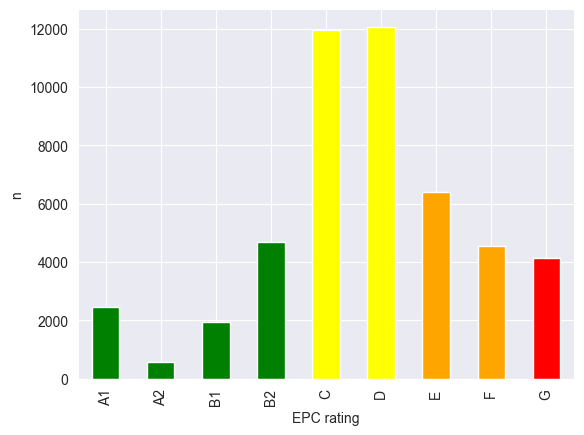

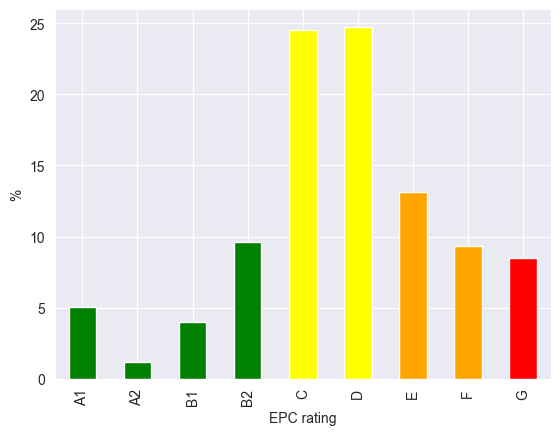

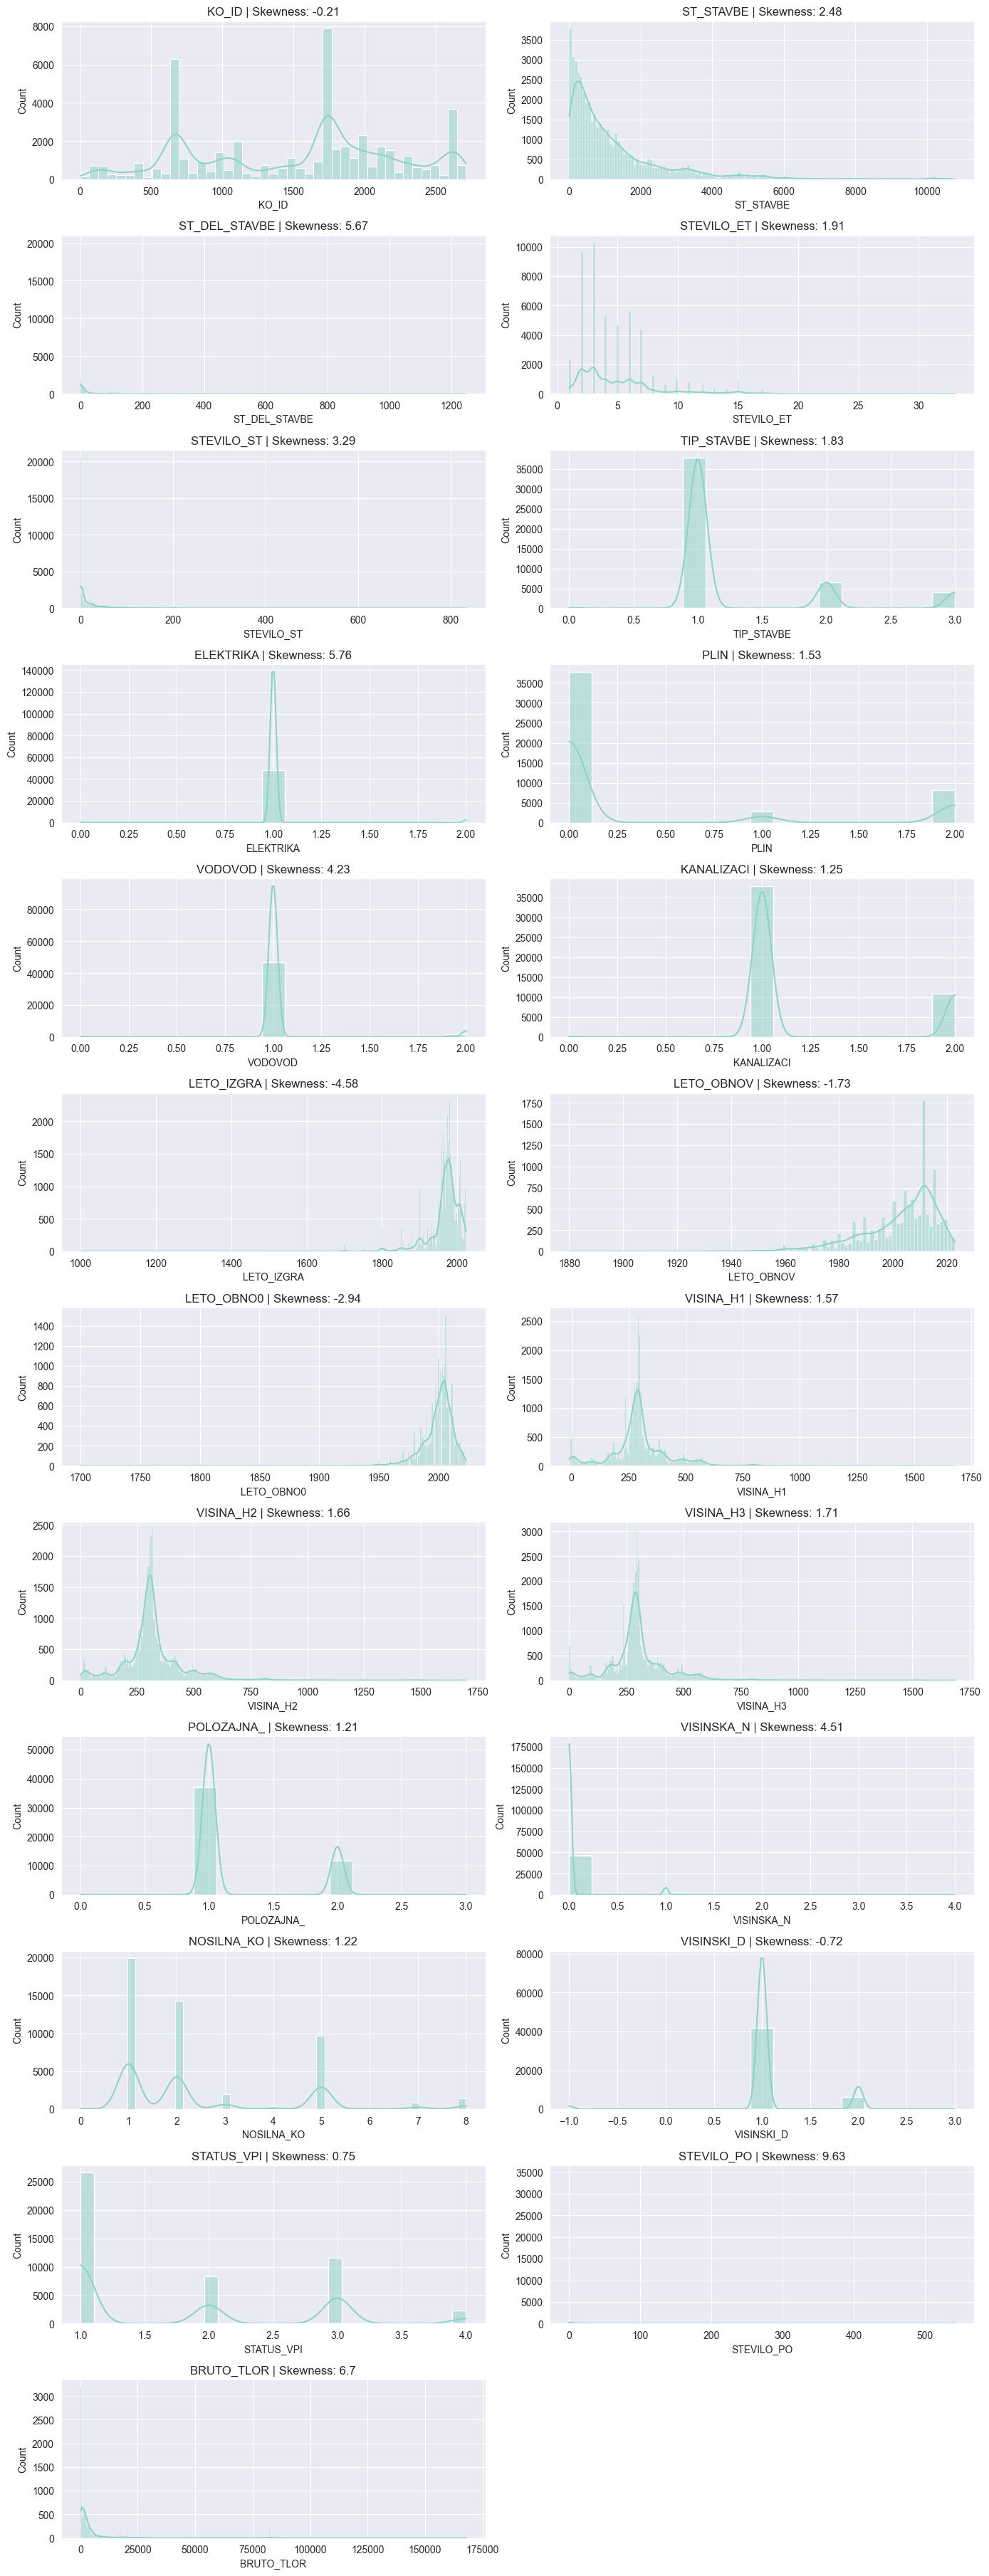

In [38]:
# Univariate Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_parquet('..\\model\\processed_data.parquet')

category_counts = data['EPC_RATING'].value_counts().sort_index()
category_counts.plot(kind='bar', color=['green', 'green', 'green', 'green', 'yellow', 'yellow', 'orange', 'orange', 'red', 'red'])

plt.xlabel('EPC rating')
plt.ylabel('n')
plt.show()

category_percentages = data['EPC_RATING'].value_counts(normalize=True) * 100
category_percentages = category_percentages.sort_index()
category_percentages.plot(kind='bar', color=['green', 'green', 'green', 'green', 'yellow', 'yellow', 'orange', 'orange', 'red', 'red'])

plt.xlabel('EPC rating')
plt.ylabel('%')
plt.show()


   
sns.set_style("darkgrid")
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns
 
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")
 
plt.tight_layout()
plt.show()


<Axes: xlabel='EPC_RATING', ylabel='LETO_IZGRA'>

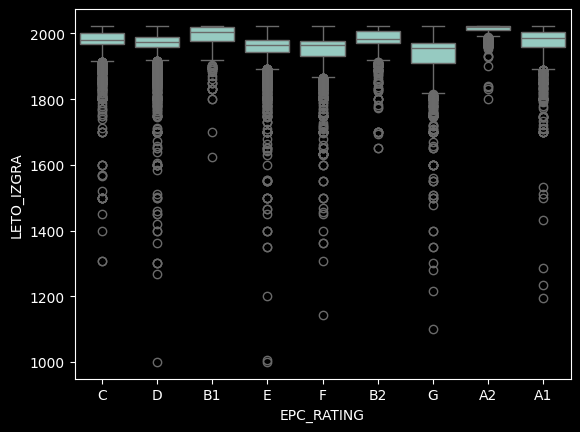

In [1]:
# Bivariate Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_parquet('..\\model\\processed_data.parquet')


# sns.set_palette("Pastel1")
# plt.figure(figsize=(10, 6))
 
# sns.pairplot(data)
 
# plt.suptitle('Pair Plot for DataFrame')
# plt.show()


sns.boxplot(x='EPC_RATING', y='LETO_IZGRA', data=data)



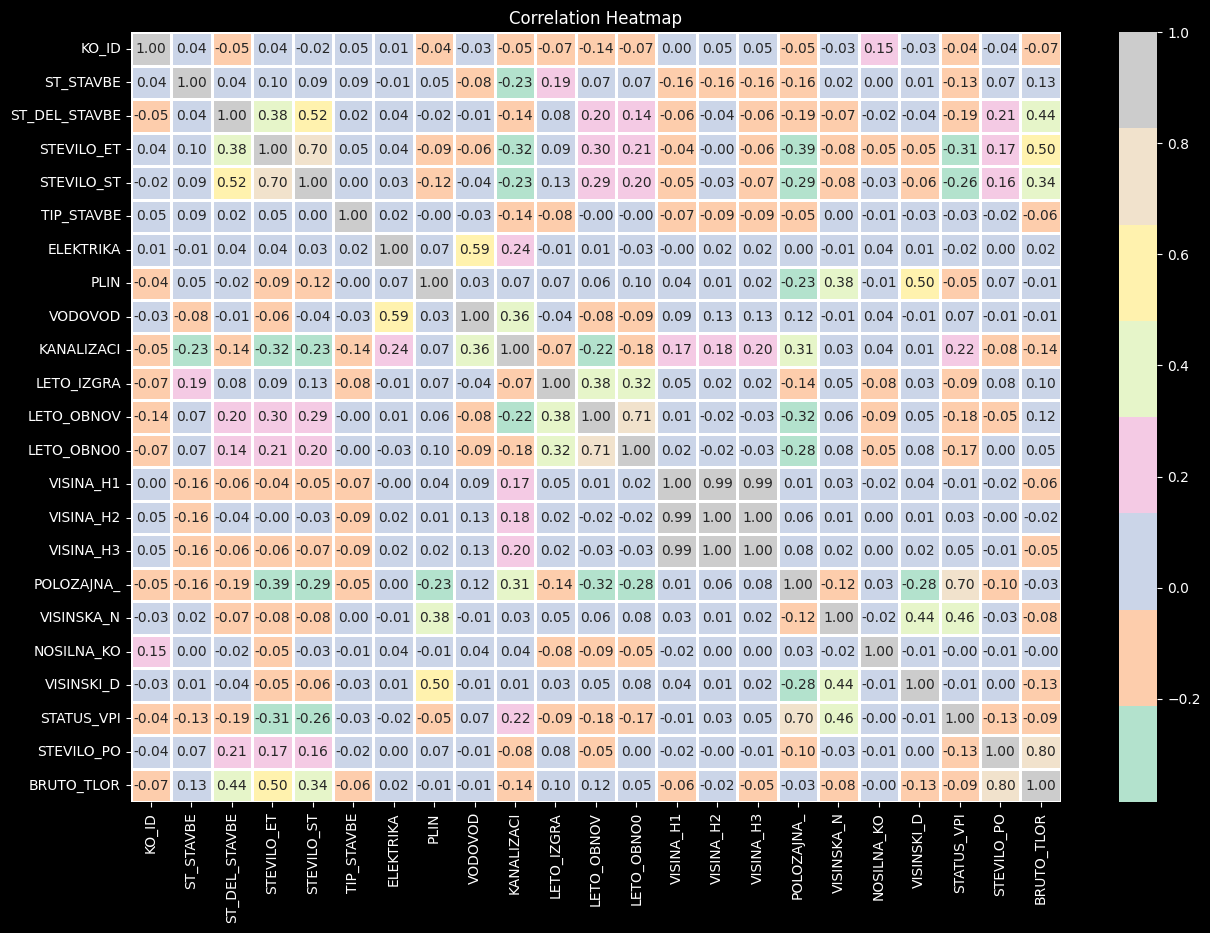

In [4]:
# Multivariate Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_parquet('..\\model\\processed_data.parquet')

plt.figure(figsize=(15, 10))

numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns
data = data[numerical_columns]

sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
 
plt.title('Correlation Heatmap')
plt.show()
